In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()


# Load the data

In [2]:
data = pd.read_csv('Healthcare.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Shape

In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Cheak null values in data

In [7]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Find the duplicate values

In [9]:
data.duplicated(subset=None , keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [10]:
data.drop_duplicates(subset=None, keep='first' , inplace= False
                    )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# preliminary statistical summary 

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Find measures of central tendencies

In [12]:
data.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [13]:
data.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [14]:
data.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,120.0,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


age            AxesSubplot(0.125,0.125;0.0466867x0.755)
sex         AxesSubplot(0.181024,0.125;0.0466867x0.755)
cp          AxesSubplot(0.237048,0.125;0.0466867x0.755)
trestbps    AxesSubplot(0.293072,0.125;0.0466867x0.755)
chol        AxesSubplot(0.349096,0.125;0.0466867x0.755)
fbs          AxesSubplot(0.40512,0.125;0.0466867x0.755)
restecg     AxesSubplot(0.461145,0.125;0.0466867x0.755)
thalach     AxesSubplot(0.517169,0.125;0.0466867x0.755)
exang       AxesSubplot(0.573193,0.125;0.0466867x0.755)
oldpeak     AxesSubplot(0.629217,0.125;0.0466867x0.755)
slope       AxesSubplot(0.685241,0.125;0.0466867x0.755)
ca          AxesSubplot(0.741265,0.125;0.0466867x0.755)
thal        AxesSubplot(0.797289,0.125;0.0466867x0.755)
target      AxesSubplot(0.853313,0.125;0.0466867x0.755)
dtype: object

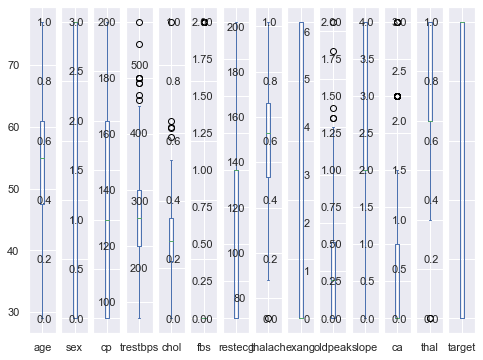

In [38]:
data.plot(kind='box',subplots=True,figsize=(8,6))

{'whiskers': [<matplotlib.lines.Line2D at 0x202c291deb0>,
 'caps': [<matplotlib.lines.Line2D at 0x202c293b550>,
 'boxes': [<matplotlib.lines.Line2D at 0x202c291dbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x202c293ba30>],
 'fliers': [<matplotlib.lines.Line2D at 0x202c293bd00>],
 'means': []}

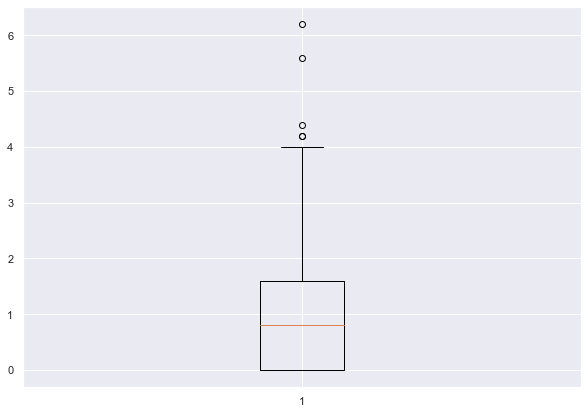

In [16]:
plt.figure(figsize=(10,7))
plt.boxplot(data['oldpeak'])

# b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [17]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [18]:
catcols = ['sex','cp','fbs','restecg','exang','ca','thal','target']
numcols  =['age','trestbps','chol','thalach','oldpeak','slope']

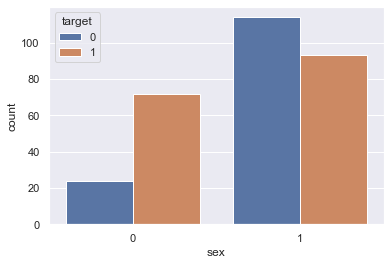

In [19]:
sns.countplot(x='sex',hue= 'target', data=data)
plt.show()

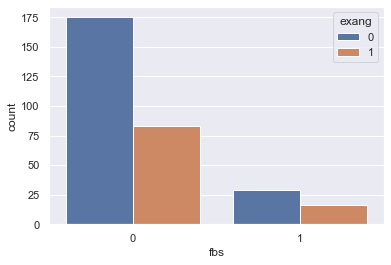

In [20]:
sns.countplot(x='fbs', hue='exang',data = data)
              
               
plt.show()

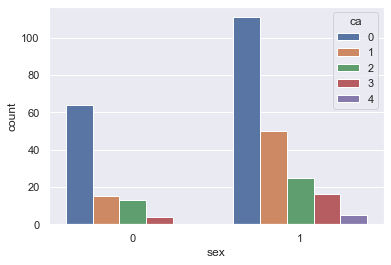

In [21]:
sns.countplot(x='sex',hue= 'ca', data=data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

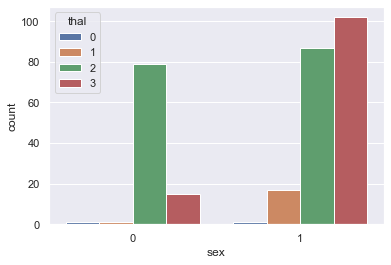

In [22]:
sns.countplot(x='sex',hue= 'thal', data=data)
plt.show

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

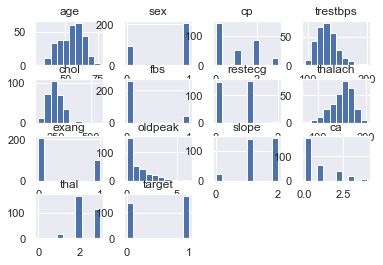

In [23]:
data.hist()

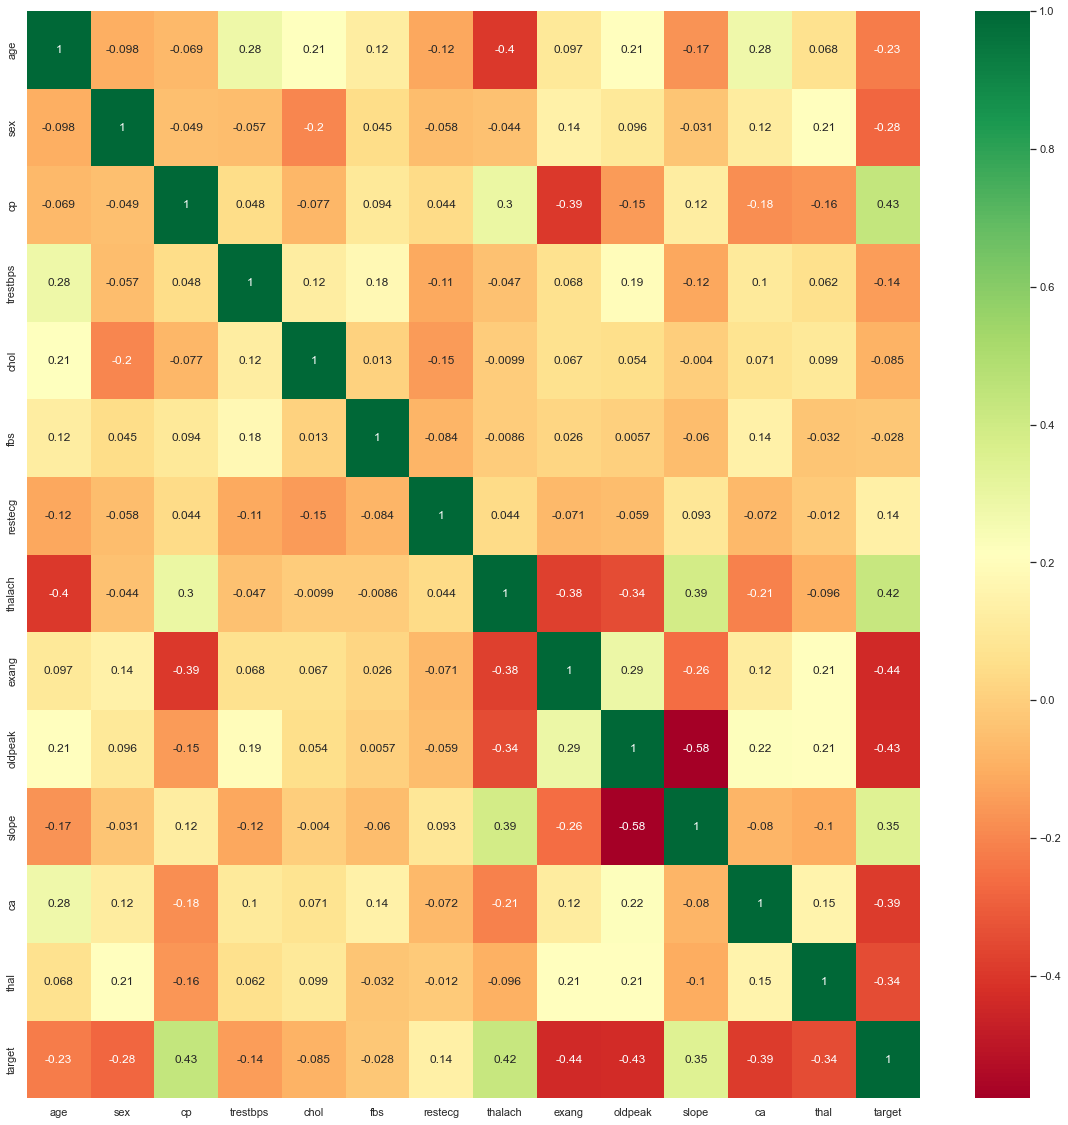

In [24]:
corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
g= sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# j.	Use a pair plot to understand the relationship between all the given variables

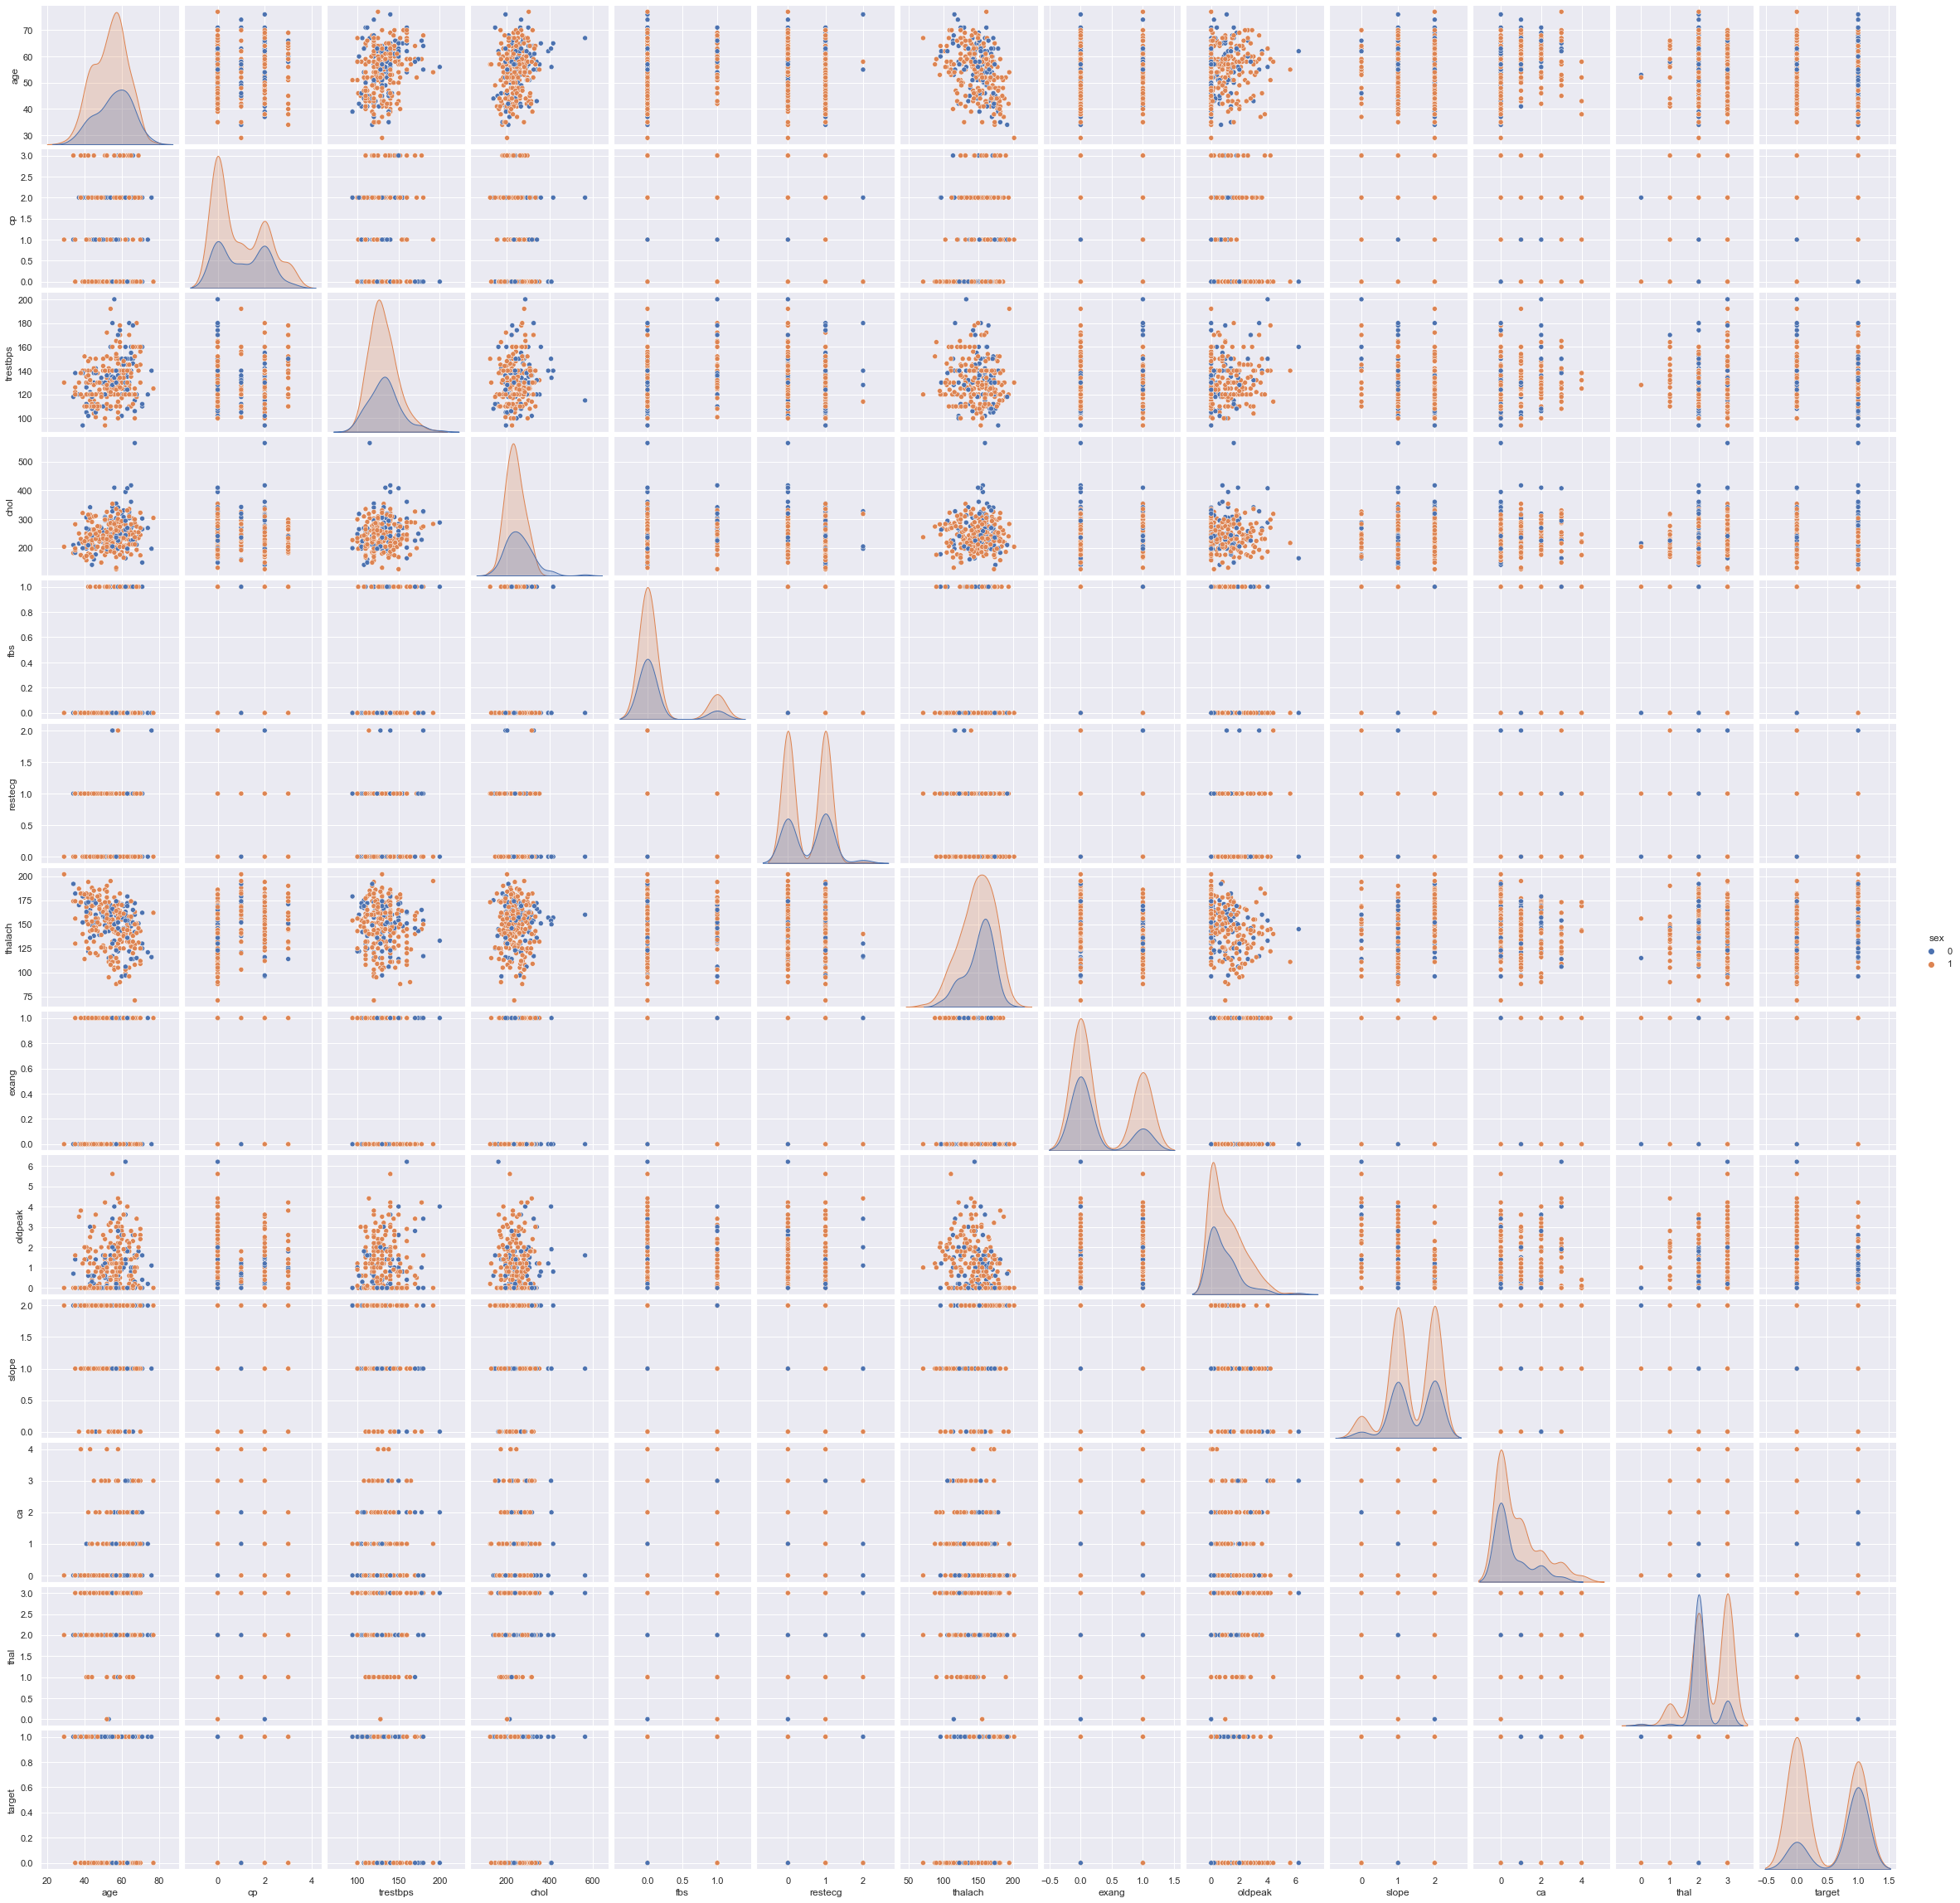

In [25]:
sns.pairplot(data=data,hue='sex')
plt.show()

# f.	Describe the relationship between cholesterol levels and a target variable

In [26]:
cho = data['chol']

In [27]:
cho


0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

In [28]:
tar = data['target']

In [33]:
np.corrcoef(cho,tar)

array([[ 1.        , -0.08523911],
       [-0.08523911,  1.        ]])

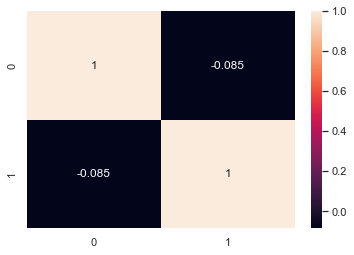

In [37]:
ax= sns.heatmap(np.corrcoef(cho,tar),annot=True)

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
x = data.drop(['sex','age'],axis=1)
y = data['sex'].astype('str')

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# Model training

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression()

In [48]:
lr.fit(x_train,y_train)

LogisticRegression()

# Prediction

In [49]:
pred_train= lr.predict(x_train)

In [50]:
pred_test = lr.predict(x_test)

# Evaluation

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
acc_train = accuracy_score(y_train,pred_train)
acc_test = accuracy_score(y_test,pred_test)

In [53]:
acc_train,acc_test

(0.6981132075471698, 0.6923076923076923)

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

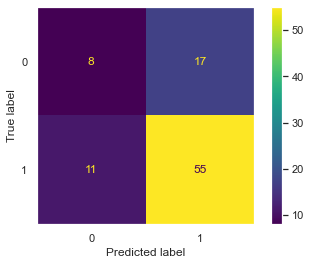

In [55]:
ConfusionMatrixDisplay.from_estimator(lr, x_test,y_test)
plt.grid()

In [57]:
(55+8)/(8+17+11+55)

0.6923076923076923

In [58]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.42      0.32      0.36        25
           1       0.76      0.83      0.80        66

    accuracy                           0.69        91
   macro avg       0.59      0.58      0.58        91
weighted avg       0.67      0.69      0.68        91



In [60]:
lr.coef_

array([[ 0.0404258 ,  0.0048901 , -0.014378  , -0.03678335, -0.7757979 ,
         0.01172649,  0.14153665,  0.20435189,  0.11586977,  0.2392713 ,
         0.9428529 , -0.91177705]])